# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
134566,7315322828,lewiston / clarkston,13998,2014.0,acura,ilx premium,excellent,4 cylinders,gas,79298.0,clean,automatic,19VDE1F52EE009673,fwd,mid-size,sedan,white,id
186041,7316243851,boston,9995,2010.0,toyota,sienna,NaN,NaN,gas,135325.0,clean,automatic,5TDDK4CC3AS028656,NaN,NaN,other,blue,ma
154753,7310835956,south bend / michiana,15990,2011.0,audi,a4 2.0t avant quattro,good,NaN,gas,81605.0,clean,other,WAUSFAFL1BA114095,NaN,NaN,wagon,brown,in
262282,7315986936,las cruces,3800,2010.0,mazda,3,good,4 cylinders,gas,107427.0,clean,automatic,NaN,fwd,compact,sedan,grey,nm
350388,7315324280,rapid city / west SD,1800,2007.0,ford,focus,good,4 cylinders,gas,160000.0,clean,automatic,NaN,fwd,mid-size,sedan,brown,sd


In [4]:
ans = df['region'].unique() 
ans1 = df['manufacturer'].unique()
ans2 = df['model'].unique()
ans3 = df['condition'].unique()
ans4 = df['cylinders'].unique()
ans5 = df['fuel'].unique()
ans6 = df['title_status'].unique()
ans7 = df['transmission'].unique()
ans8 = df['drive'].unique()
ans9 = df['fuel'].unique()
print(ans, ans1, ans2, ans3, ans4, ans5, ans6, ans7, ans8, ans9)

['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado springs' 'denve

In [5]:
#non value added
df.drop(columns = "id", inplace = True)
df.drop(columns = "VIN", inplace = True)

In [6]:
#redundant with state
df.drop(columns = "region", inplace = True)

In [7]:
ans10 = df['size'].unique()
ans11 = df['type'].unique()
print(ans10, ans11)

[nan 'full-size' 'mid-size' 'compact' 'sub-compact'] [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']


In [8]:
df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
395415,6750,2007.0,honda,cr-v,NaN,NaN,gas,181527.0,clean,automatic,fwd,NaN,SUV,green,va
419867,14000,2006.0,chevrolet,silverado 2500hd,good,8 cylinders,diesel,207000.0,lien,automatic,4wd,full-size,truck,grey,wi
401789,52000,2019.0,ram,2500,NaN,NaN,diesel,64730.0,clean,automatic,NaN,NaN,pickup,white,wa
106192,500,2010.0,chevrolet,colorado,NaN,NaN,gas,10000000.0,clean,automatic,NaN,NaN,NaN,NaN,fl
119862,25995,2016.0,rover,discovery sport,good,4 cylinders,gas,48860.0,clean,automatic,4wd,full-size,SUV,white,fl


The goal is to understand how the price is determined and which factors determine the price of the car. Carmax is a company that use a model to determine the price that they will purchase and sell a car. The goal of this exercise is to create a model using the data provided.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
missing_vals = df.isnull().sum()
missing_vals

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

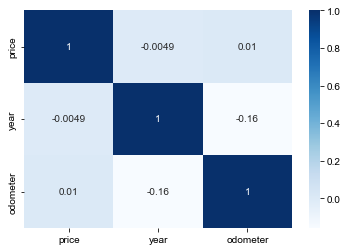

In [10]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
sns.set(rc = {'figure.figsize':(12,8)})

In [11]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


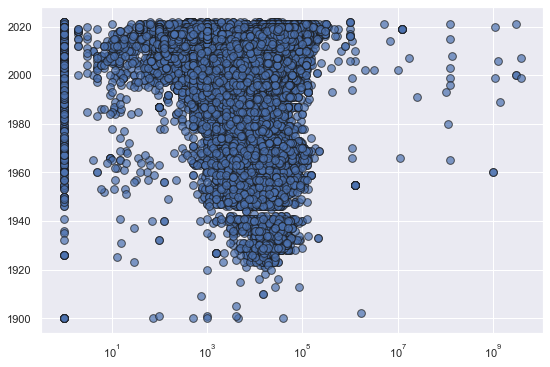

In [37]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(df['price'], df['year'],s=60, alpha=0.7, edgecolors="k")
# Set logarithmic scale on the x variable
ax.set_xscale("log");

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [12]:
# Some features are very relevant and their null values needs to be removed
df1 = df.dropna(subset= ['year', 'manufacturer', 'model','condition','cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color'])
#there are many price value 0, and needs to be replaced by the mean 
df1['price'] = df['price'].replace(0, (df["price"].mean()))
df1.sample(10)

/var/folders/3m/hz16b89x1svg_n_kjs54_ckw0000gn/T/ipykernel_5476/4240610936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df['price'].replace(0, (df["price"].mean()))


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
14142,9995.000000,2010.0,ford,f150,good,8 cylinders,gas,175303.0,clean,automatic,rwd,full-size,pickup,white,az
104828,11950.000000,2013.0,kia,optima,excellent,4 cylinders,gas,110000.0,clean,automatic,fwd,mid-size,sedan,black,fl
59107,12500.000000,2011.0,bmw,x5 35d,good,6 cylinders,diesel,132000.0,clean,automatic,4wd,full-size,SUV,grey,ca
375670,5900.000000,2016.0,nissan,versa,like new,4 cylinders,gas,115205.0,rebuilt,automatic,fwd,mid-size,sedan,grey,tx
116320,75199.033187,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,4wd,full-size,truck,white,fl
296351,2500.000000,2008.0,bmw,550i,like new,8 cylinders,gas,107000.0,clean,automatic,rwd,mid-size,sedan,black,oh
312806,2000.000000,2003.0,honda,cr-v ex,good,4 cylinders,gas,195560.0,salvage,automatic,4wd,mid-size,SUV,black,or
388928,9500.000000,2014.0,ford,taurus limited awd,like new,6 cylinders,gas,130000.0,clean,automatic,4wd,full-size,sedan,white,vt
230109,8900.000000,2013.0,hyundai,genesis,good,8 cylinders,gas,137000.0,clean,automatic,rwd,full-size,sedan,custom,nc
415102,12990.000000,2011.0,jeep,grand cherokee overland,good,6 cylinders,gas,168350.0,clean,automatic,4wd,full-size,SUV,black,wi


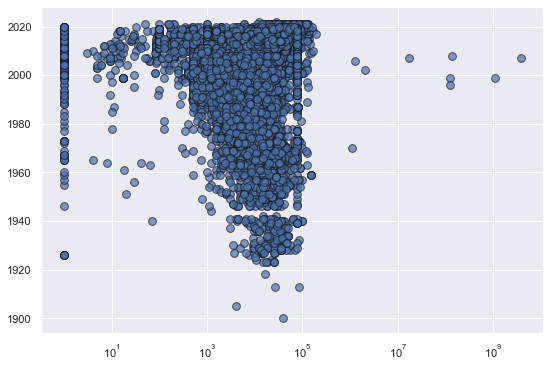

In [13]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(df1['price'], df1['year'],s=60, alpha=0.7, edgecolors="k")
# Set logarithmic scale on the x variable
ax.set_xscale("log");

In [14]:
df1.describe()

,price,year,odometer
count,7.919500e+04,79195.000000,7.919500e+04
mean,8.271531e+04,2008.481937,1.244489e+05
std,1.387574e+07,9.993920,2.430582e+05
min,1.000000e+00,1900.000000,0.000000e+00
25%,5.500000e+03,2006.000000,7.300000e+04
50%,9.999000e+03,2011.000000,1.140000e+05
75%,1.999000e+04,2014.000000,1.554140e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [15]:
missing_vals1 = df1.isnull().sum()
missing_vals1

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

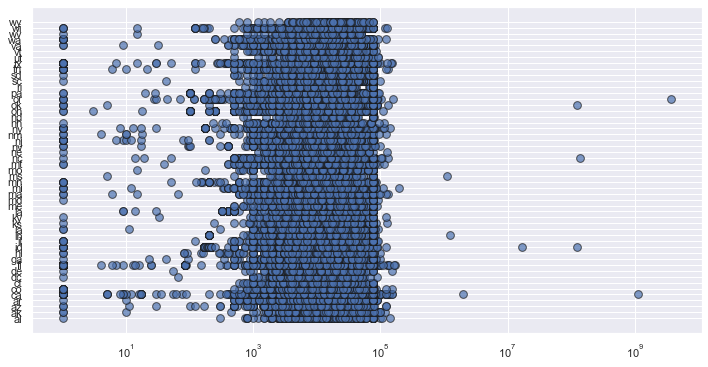

In [16]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(df1['price'], df1['state'],s=60, alpha=0.7, edgecolors="k")
# Set logarithmic scale on the x variable
ax.set_xscale("log");

In [17]:
#one hot enconding
df_encoded = pd.get_dummies(df1)

In [18]:
df_encoded.head()

,price,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
31,15000.0,2013.0,128000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,19900.0,2004.0,88000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,14000.0,2012.0,95000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,22500.0,2001.0,144700.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,15000.0,2017.0,90000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [20]:
pca = PCA(n_components=3, random_state = 42)
np_pca = pca.fit_transform(df_encoded)
np_pca1 = pca.fit(df_encoded)

In [21]:
np_pca1.explained_variance_ratio_

array([9.99693257e-01, 3.06743113e-04, 5.14645116e-13])

In [22]:
df_pca = pd.DataFrame(np_pca)
df_pca

,0,1,2
0,-67715.266406,3551.852600,-4.521650
1,-62815.714635,-36448.202271,4.635966
2,-68715.636194,-29448.136188,-3.415675
3,-60215.079271,20251.768602,7.445375
4,-67715.692223,-34448.147412,-8.372683
...,...,...,...
79190,-64715.243995,5551.819013,3.462450
79191,-64715.418804,-10048.180929,18.521976
79192,-72915.412080,-9448.089024,23.520784
79193,-75915.921379,-54898.055449,11.717816


In [33]:
kmeans = KMeans(n_clusters = 3, random_state = 123).fit(df_pca)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<Figure size 864x576 with 0 Axes>

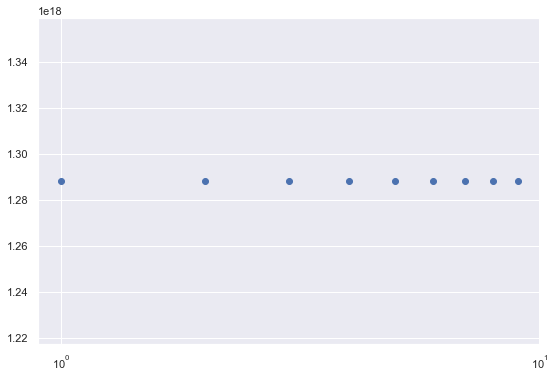

In [34]:
ax.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c=kmeans.labels_)
#plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c=kmeans.labels_)
sse = {}
for k in range(1,10):
        kmeans = KMeans(n_clusters = 2, random_state = 123, max_iter = 1000).fit(df_pca)
        sse[k] = kmeans.inertia_
plt.figure()
#plt.plot(list(sse.keys()), list(sse.values()))
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(list(sse.keys()), list(sse.values()))
# Set logarithmic scale on the x variable
ax.set_xscale("log");

In [36]:
print(df1.groupby("Cluster").mean)

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1207ffd60>>


In [38]:
df2 = pd.DataFrame(df1.groupby("Cluster")['price'].agg(pd.Series.mode))
df2

,price
Cluster,
0,7.519903e+04
1,3.736929e+09
2,1.111111e+09


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn import set_config
set_config(display="diagram")
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [45]:
X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
lr_base = LinearRegression().fit(X_train, y_train)
print(lr_base)
lr_base_mse_train = mean_squared_error(lr_base.predict(X_train),y_train)
lr_base_mse_test = mean_squared_error(lr_base.predict(X_test),y_test)
lr_base_r_squared = lr_base.score(X,y)
print(f'Baseline Score (R_squared): {lr_base_r_squared}')
print(f'Baseline (Coeficients): {lr_base.coef_}')
print(f'Baseline MSE (Training data): {lr_base_mse_train}')
print(f'Baseline MSE (Test data): {lr_base_mse_test}')

LinearRegression()
Baseline Score (R_squared): 0.00858051725997544
Baseline (Coeficients): [-1.02725105e+04 -1.29778684e-02 -4.19494693e+04 ...  2.43413183e+04
  7.86594135e+04 -1.14315814e+06]
Baseline MSE (Training data): 253331298165521.25
Baseline MSE (Test data): 3536296583218.569


In [49]:
#Ridge Regressor
ridge_param_dict = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], }
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [50]:
ridge_mse_train = mean_squared_error(y_train, ridge_grid.predict(X_train))
ridge_mse_test = mean_squared_error(y_test, ridge_grid.predict(X_test))
print(f'Ridge MSE training data: {ridge_mse_train}')
print(f'Ridge MSE testing data: {ridge_mse_test}')
ridge_best_alpha = ridge_grid.best_params_
print(f'Best alpha: {list(ridge_best_alpha.values())[0]}')

Ridge MSE training data: 253332554942735.12
Ridge MSE testing data: 3430895607663.019
Best alpha: 1000


In [52]:
ridge_model = Ridge().fit(X_train, y_train)
ridge_model_coefs = ridge_model.coef_
print(f'Ridge Coefficients: {np.round(ridge_model_coefs, 2)}')

Ridge Coefficients: [-7.41925000e+03 -1.00000000e-02 -3.99858100e+04 ...  2.47873400e+04
  7.51768100e+04 -1.02504195e+06]


In [ ]:
ridgex = Ridge().fit(X, y)
base_score = ridgex.score(X_test, y_test)
print(f'Ridge Score (R_squared): {base_score}')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.